# TP 7: Esquina
-----------------------------------------------------------
En este Trabajo práctico buscamos definir los objetos de interés mediante la transformada de Hough. Este algoritmo utiliza una tecnica de "votación" para posiciones factibles, puede detectar cualquier forma, mientras sea matemáticamente parametrizable. Existen dos tipos de parametrización: 
 
+ Hough-líneas: se representa la línea en coordenadas polares como: 
$ \rho= x\cos(\theta) + y \sin(\theta)$, siendo:
    1. $\rho$: La distancia perpendicular al origen de la línea 
    2. $\theta$: el ángulo formado por esa perpendicular y la horizontal en sentido antihorario.

Se utiliza esta parametrización puesto que en cartesianas la pendiente m a medida que tiende a ser vertical, m tiende a infinito.

+ Hough-Circulos: puede parametrizarse como: $r^2=\left(x-x_c\right)^2+\left(y-y_c\right)^2$.

Para este trabajo utilizaremos solamente el algoritmo de Hough de líneas.

In [1]:
#Importamos los paquetes

%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

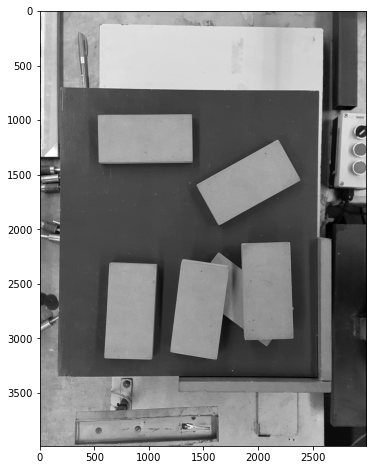

In [2]:
# Leemos la imagen
#=================
img = cv.imread('bloques1.jpg')
imgRGB=cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#Mostramos imagen en gris
plt.figure(figsize=(10,8))
plt.imshow(gray, cmap='gray')
plt.show()

## Resolución

+ Modificamos la imagen usando pirámides Gaussianas, las cuales además de reducir la resolución aplican un filtro Gaussiano que va suavizando la misma. De esta manera el procesamiento se ve optimizado debido a que se redujo el tamaño y peso de la imagen.

In [3]:
print('\nTamaño imagen original: {} pix'.format(gray.shape))

#Nivel 1
img_nivel_1 = cv.pyrDown(gray)
print('\nTamaño imagen nivel 1: {} pix'.format(img_nivel_1.shape))

#Nivel 2
img_nivel_2 = cv.pyrDown(img_nivel_1)
print('\nTamaño imagen nivel 2: {} pix'.format(img_nivel_2.shape))

#Nivel 3
img_nivel_3 = cv.pyrDown(img_nivel_2)
print('\nTamaño imagen nivel 3: {} pix'.format(img_nivel_3.shape))


Tamaño imagen original: (3984, 2988) pix

Tamaño imagen nivel 1: (1992, 1494) pix

Tamaño imagen nivel 2: (996, 747) pix

Tamaño imagen nivel 3: (498, 374) pix


## Histograma - Imagen ecualizada

+ Ecualizamos la imagen realizando un ajuste de histograma de manera tal que lo "estiramos" para uniformizar los valores de intensidad a lo largo de todo el rango. Con esto logramos una imagen con mejor contraste y gran variedad de niveles de gris.

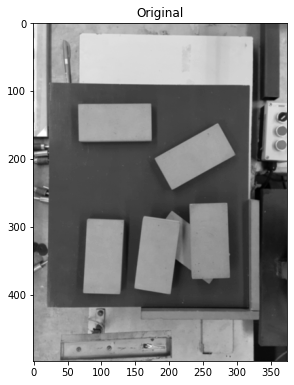

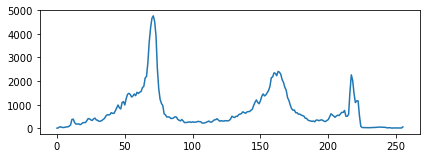

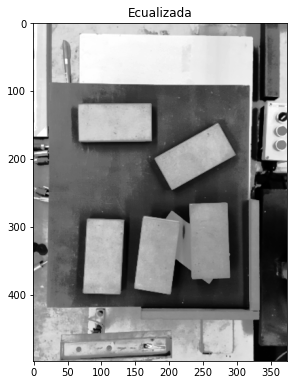

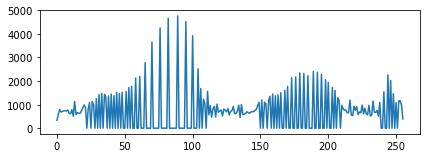

In [4]:
# Imagen original
plt.figure(figsize=(10,15))
ax1=plt.subplot(221)
ax1.imshow(img_nivel_3, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

plt.figure(figsize=(15,5))
hist1,bins1 = np.histogram(img_nivel_3.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
img_eqzd = cv.equalizeHist(img_nivel_3)

plt.figure(figsize=(10,15))
ax2=plt.subplot(222)
ax2.imshow(img_eqzd, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Ecualizada')

plt.figure(figsize=(15,5))
hist2,bins2 = np.histogram(img_eqzd.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

## Suavizado Gaussiano

+ Usamos un filtro Gaussiano sobre la imagen ya ecualizada para desenfocar los bordes de los bloques mediante la función que proveé opencv "cv.GaussianBlur". 

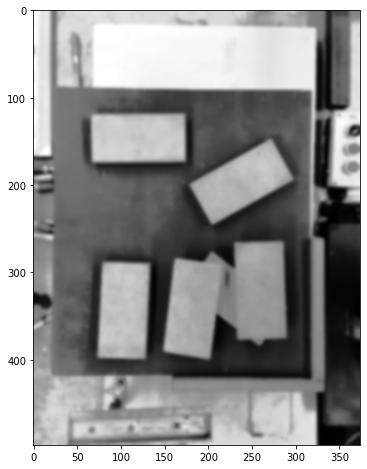

In [5]:
gaussian = cv.GaussianBlur(img_eqzd, (9, 9), 0)

plt.figure(figsize=(10,8))
plt.imshow(gaussian, cmap='gray')
plt.show()

## Canny

+ Usamos el algoritmo de Canny para obtener la imagen de bordes. Todo el procesamiento anterior fue realizado para obtener un mejor resultado con Canny

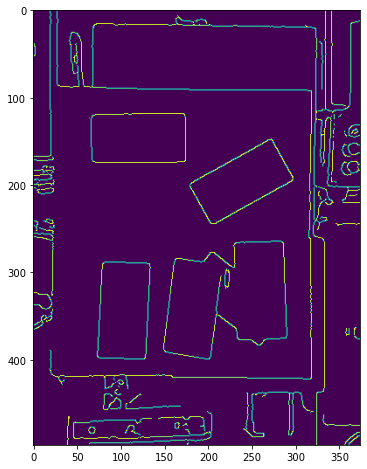

In [6]:
# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(gaussian,50,120,apertureSize = 3)

plt.figure(figsize=(10,8))
plt.imshow(edges)
plt.show()

## Transformada de Hough - Líneas

+ Finalmente procesamos la imagen con la función de opencv "cv.HoughLines", la cual recibe los siguientes parámetros:
    1. rho_step: El paso mínimo por píxel en el que hallará distintas rectas.
    2. theta_step: El paso angular en radianes por el cual va a evaluar las rectas.
    3. thresh: el umbral mínimo de votos.  

In [7]:
def transformada_de_hough(imagen,edges,rho_step,theta_step,thresh):
    '''Devuelve la imagen con la transformada de hough aplicada'''
    lines = cv.HoughLines(edges,rho_step,theta_step,thresh)

    # Dibujamos lo resultados
    #========================
    imgRGB=cv.cvtColor(imagen,cv.COLOR_BGR2RGB)
    img_out = imgRGB.copy()


    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(img_out,(x1,y1),(x2,y2),(0,0,255),1)
    
    return img_out

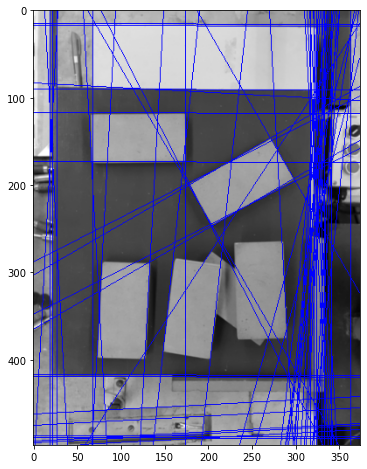

In [8]:
# Obtenemos las líneas por la transformada de Hough
#==================================================
rho_step = 1
theta_step = (np.pi/180)*3
thresh = 50

img_out = transformada_de_hough(img_nivel_3,edges,rho_step,theta_step,thresh)

plt.figure(figsize=(10,8))
plt.imshow(img_out)
plt.show()

## Resolución 
+ Devolvemos la imagen ya analizada en el formato original, aplicando pirámides Gaussianas.

In [9]:
def pyrUp_imagenes(imagen):
    imgs_pyrUp = []
    img=imagen
    
    for i in range(0,4):
        print('\nTamaño imagen nivel {}: {} pix'.format(i,img.shape))
        imgs_pyrUp.append(img)
        img = cv.pyrUp(img)
    
    return imgs_pyrUp


Tamaño imagen original: (3984, 2988) pix

Tamaño imagen nivel 0: (498, 374, 3) pix

Tamaño imagen nivel 1: (996, 748, 3) pix

Tamaño imagen nivel 2: (1992, 1496, 3) pix

Tamaño imagen nivel 3: (3984, 2992, 3) pix


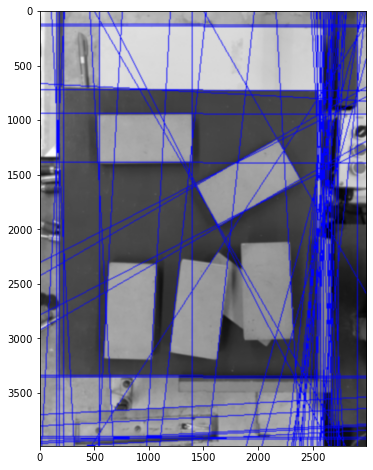

In [10]:
print('\nTamaño imagen original: {} pix'.format(gray.shape))

imgs = pyrUp_imagenes(img_out)
img_hough_nivel_3 = imgs[3]

plt.figure(figsize=(10,8))
plt.imshow(img_hough_nivel_3)
plt.show()

# Otro Metodo

+ Probamos con otro metodo para comparar los resultados en la imagen anteriormente obtenida.

## Filtro Bilateral

+ Utilizamos este filtro de suavizado para desenfocar la imagen exceptuando los bordes, dado que allí se encuentran cambios de intensidad altos.

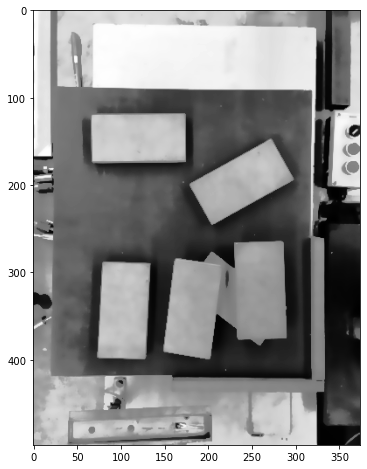

In [11]:
d=9
img_bilateral = cv.bilateralFilter(img_eqzd, d, 2*d, d/2)

plt.figure(figsize=(10,8))
plt.imshow(img_bilateral, cmap='gray')
plt.show()

## Canny
+ Procesamos la imagen por canny para obtener la imagen de bordes

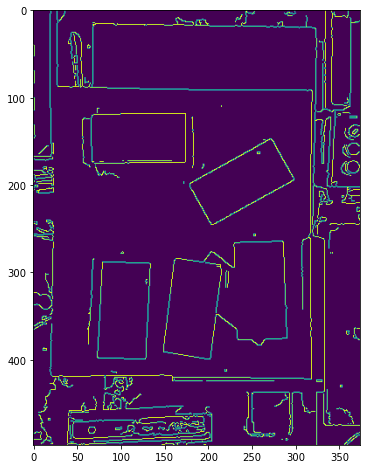

In [12]:
# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(img_bilateral,50,120,apertureSize = 3)

plt.figure(figsize=(10,8))
plt.imshow(edges)
plt.show()

## Transformada de Hough

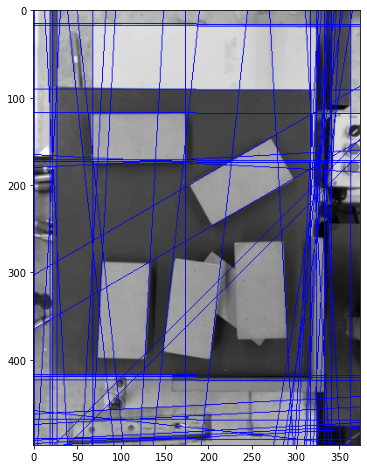

In [13]:
# Obtenemos las líneas por la transformada de Hough
#==================================================
rho_step = 1
theta_step = (np.pi/180)*3
thresh = 65

img_out = transformada_de_hough(img_nivel_3,edges,rho_step,theta_step,thresh)

plt.figure(figsize=(10,8))
plt.imshow(img_out)
plt.show()

## Resolución


Tamaño imagen original: (3984, 2988) pix

Tamaño imagen nivel 0: (498, 374, 3) pix

Tamaño imagen nivel 1: (996, 748, 3) pix

Tamaño imagen nivel 2: (1992, 1496, 3) pix

Tamaño imagen nivel 3: (3984, 2992, 3) pix


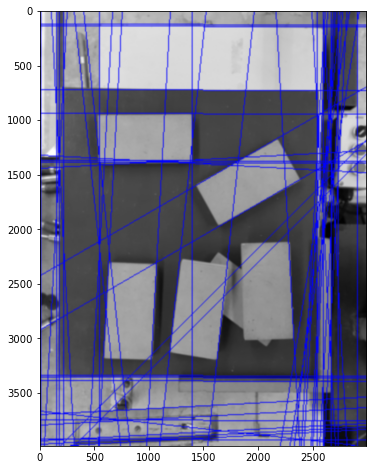

In [14]:
print('\nTamaño imagen original: {} pix'.format(gray.shape))

imgs = pyrUp_imagenes(img_out)
img_hough_nivel_3 = imgs[3]

plt.figure(figsize=(10,8))
plt.imshow(img_hough_nivel_3)
plt.show()

## Análisis de Resultados y conclusiones

+ Luego de ambos procesamientos obtuvimos resultado similares, aún asi con el primer algoritmo llegamos a una imagen de bordes más definida y con menos ruido (lo cual facilita el analsis que realiza la transformada de Hough).